In [1]:
import pandas as pd
import numpy as np
import os

os.chdir('/home/brian/Documents/CPS/data/clean')

In [18]:
columns = ['MONTH', 'YEAR', 'LFS', 'INDGRP', 'AGE', 'PWSSWGT', 'BASICWGT',
           'FEMALE', 'PRCHLD', 'MARRIED', 'REGION', 'HRSUSL1', 'WORKFT',
           'NILFREASON', 'UNEMPTYPE', 'PREMPHRS', 'HRSACTT', 'CPSID',
           'INDD', 'INDM', 'OCCD', 'OCCM', 'COW1', 'CERT', 'DISABILITY',
           'PRFAMNUM', 'PWORWGT', 'RHRWAGE', 'RWKWAGE', 'UNIONMEM',
           'HRSACT1', 'MJH', 'STATE', 'EDUC', 'HRSUSLT', 'PRDISC', 
           'PTECON']

df = pd.concat([(pd.read_feather(f'cps{year}.ft', columns=columns))
      for year in range(2017, 2021)])

In [19]:
dfm = df.query('YEAR > 2017 or (YEAR == 2017 and MONTH in [11, 12])')
#dft = dfm.query('LFS == "Employed" and AGE >= 60 and AGE <= 62')

#(dft.query('HRSUSLT >= 60').groupby(['MONTH', 'FEMALE']).BASICWGT.sum() / 
# dft.groupby(['MONTH', 'FEMALE']).BASICWGT.sum())

In [ ]:
#hrsgrp = lambda x: np.where((x.HRSACTT > 0) & (x.HRSACTT < 35), 'Part-time', )

In [20]:
dft = dfm.query('AGE >= 50 and AGE <= 75')

<AxesSubplot:xlabel='AGE'>

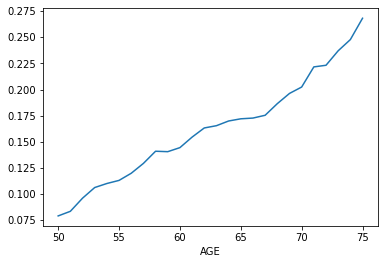

In [22]:
query = 'PTECON == 1 or LFS == "Unemployed" or NILFREASON == "Discouraged"'
query = 'HRSACTT >= 50'
query = 'NILFREASON == "Retired"'
query = 'DISABILITY == 1'
groups = ['YEAR', 'MONTH', 'AGE']

((dft.query(query).groupby(groups).BASICWGT.sum() / 
  dft.groupby(groups).BASICWGT.sum()).unstack().mean().plot())

In [ ]:
dfm = df.query('YEAR > 2017 or (YEAR == 2017 and MONTH in [11, 12])')